In [ ]:
### DDOS分析

In [4]:
# 分块读取大文件
def read_file_bt_chunk(file_path, chunk_size=100000):
    """
    read_csv()函数的iterator参数等于True时，表示返回一个TextParser以便逐块读取文件；
    chunk_size表示文件块的大小，用于迭代；
    TextParser类的get_chunk方法用于读取任意大小的文件块；
    StopIteration的异常表示在循环对象穷尽所有元素时报错；
    concat()函数用于将数据做轴向连接
    """
    import pandas as pd
    with open(file_path, 'r') as file:
        reader = pd.read_csv(file, sep=',', iterator=True, low_memory=False)
        loop = True
        chunks = []
        while loop:
            try:
                chunk = reader.get_chunk(chunk_size)
                chunks.append(chunk)
            except StopIteration as ex:
                loop = False
                print("Iteration is stopped.%s" % ex)
    return pd.concat(chunks, ignore_index=True)

In [2]:
!ls -lh /work/DDos

total 15G
-rwxr-xr-x 1 hadoop hadoop 1.6G Sep  1 09:40 ddos-datasets.zip
-rw-r--r-- 1 hadoop hadoop 6.4G Mar 24 05:47 final_dataset.csv
-rw-r--r-- 1 hadoop hadoop 3.9G Mar 25 05:00 unbalaced_20_80_dataset.csv
-rw-rw-r-- 1 hadoop hadoop  26M Sep  6 15:48 unbalaced_part.csv
-rw-rw-r-- 1 hadoop hadoop 493M Sep 16 12:23 unbalaced_test_1000000.csv
-rw-rw-r-- 1 hadoop hadoop 2.6G Sep 16 12:07 unbalaced_test_500000.csv


In [5]:
%%time
test_data=read_file_by_chunk("/work/DDos/unbalaced_test_1000000.csv")
test_data.head()

Iteration is stopped.
CPU times: user 25.9 s, sys: 17.4 s, total: 43.3 s
Wall time: 2min 31s


,Unnamed: 0,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,1739476,172.31.69.25-18.219.193.20-80-37882-6,18.219.193.20,37882,172.31.69.25,80,6,16/02/2018 11:27:29 PM,8660,1,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos
1,1822666,172.31.69.28-18.219.9.1-80-63287-6,172.31.69.28,80,18.219.9.1,63287,6,22/02/2018 12:13:52 AM,5829,4,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos
2,905739,172.31.69.28-52.14.136.135-80-63095-6,52.14.136.135,63095,172.31.69.28,80,6,22/02/2018 12:14:02 AM,3396,1,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos
3,1143064,172.31.69.28-18.216.200.189-80-52341-6,18.216.200.189,52341,172.31.69.28,80,6,22/02/2018 12:28:04 AM,2390,1,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos
4,1934016,172.31.69.28-18.218.55.126-80-57459-6,172.31.69.28,80,18.218.55.126,57459,6,22/02/2018 12:19:45 AM,17362,4,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos


In [ ]:
%%time
test_data1=read_file_bt_chunk("/work/DDos/unbalaced_test_5000000.csv")
test_data1.head()

In [1]:
# 导入处理的相关包
import pandas as pd
import numpy as np

In [2]:
# 导入文本文件，抽样了25万的文件做处理
pd.set_option('display.max_columns', None)
ddos_data=pd.read_csv('/work/DDos/unbalaced_part.csv')
ddos_data.shape

(50000, 85)

In [19]:
# 数据的规模 50000列 85 行
ddos_data.head()

,Row,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,6867415,172.31.0.2-172.31.67.107-53-54063-17,172.31.67.107,54063,172.31.0.2,53,17,20/02/2018 11:32:42,763,1,1,29.0,45.0,29.0,29.0,29.00,0.000000,45.0,45.0,45.000000,0.000000,96985.58322411533,2621.231979030144,763.000000,0.000000,763.0,763.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00,0.000000,0.0,0.0,0,0,0,0,8,8,1310.615990,1310.615990,29.0,45.0,34.333333,9.237604,85.333333,0,0,0,0,0,0,0,0,1.0,51.50,29.00,45.000000,0,0,0,0,0,0,1,29,1,45,-1,-1,0,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
1,866786,172.31.69.28-18.218.115.60-80-55289-6,18.218.115.60,55289,172.31.69.28,80,6,22/02/2018 12:12:02 AM,1080,1,1,0.0,0.0,0.0,0.0,0.00,0.000000,0.0,0.0,0.000000,0.000000,0.0,1851.8518518518522,1080.000000,0.000000,1080.0,1080.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00,0.000000,0.0,0.0,0,0,0,0,20,20,925.925926,925.925926,0.0,0.0,0.000000,0.000000,0.000000,0,0,0,0,1,0,0,0,1.0,0.00,0.00,0.000000,0,0,0,0,0,0,1,0,1,0,-1,32738,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos
2,26669,192.168.10.3-192.168.10.9-53-56344-17,192.168.10.9,56344,192.168.10.3,53,17,03/07/2017 06:13:17 PM,23630,1,3,35.0,253.0,35.0,35.0,35.00,0.000000,109.0,35.0,84.333333,42.723920,12187.896741430384,169.27634363097755,7876.666667,13636.724692,23623.0,3.0,0.0,0.0,0.000000,0.0,0.0,23630.0,11815.00,16704.690599,23627.0,3.0,0,0,0,0,8,24,42.319086,126.957258,35.0,109.0,64.600000,40.531469,1642.800000,0,0,0,0,0,0,0,0,3.0,80.75,35.00,84.333333,0,0,0,0,0,0,1,35,3,253,-1,-1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
3,2038975,172.31.69.28-52.14.136.135-80-51451-6,172.31.69.28,80,52.14.136.135,51451,6,22/02/2018 12:26:23 AM,163188,4,3,935.0,311.0,935.0,0.0,233.75,467.500000,311.0,0.0,103.666667,179.555934,7635.36534549109,42.89531092972523,27198.000000,66241.816738,162413.0,4.0,163182.0,54394.0,93789.086673,162692.0,21.0,162694.0,81347.00,114644.636647,162413.0,281.0,0,0,0,0,92,72,24.511606,18.383705,0.0,935.0,155.750000,333.141218,110983.071429,0,1,0,0,0,0,1,1,0.0,178.00,233.75,103.666667,0,0,0,0,0,0,4,935,3,311,-1,32768,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos
4,155024,172.31.69.28-18.218.55.126-80-62189-6,18.218.55.126,62189,172.31.69.28,80,6,21/02/2018 11:44:24 PM,11391,2,5,248.0,935.0,248.0,0.0,124.00,175.362482,935.0,0.0,187.000000,418.144712,103853.919761215,614.5202352734615,1898.500000,4261.247083,10587.0,2.0,10587.0,10587.0,0.000000,10587.0,10587.0,11391.0,2847.75,5345.340299,10858.0,2.0,0,0,0,0,40,124,175.577210,438.943025,0.0,935.0,147.875000,329.673621,108684.696429,0,1,0,0,0,0,1,1,2.0,169.00,124.00,187.000000,0,0,0,0,0,0,2,248,5,935,-1,219,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos


In [3]:
# 标签情况
ddos_data["Label"].value_counts()

Benign    40000
ddos      10000
Name: Label, dtype: int64

In [4]:
# 暂时剔除无意义的特征
del ddos_data['Row']
# 删除非数值
other_data = ddos_data.drop([
    'Flow ID', 'Src IP', 'Src Port', 'Dst IP', 'Dst Port', 'Protocol',
    'Timestamp'
],
                            axis=1)

In [24]:
other_data[:1]

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,763,1,1,29.0,45.0,29.0,29.0,29.0,0.0,45.0,45.0,45.0,0.0,96985.58322411533,2621.231979030144,763.0,0.0,763.0,763.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,8,8,1310.61599,1310.61599,29.0,45.0,34.333333,9.237604,85.333333,0,0,0,0,0,0,0,0,1.0,51.5,29.0,45.0,0,0,0,0,0,0,1,29,1,45,-1,-1,0,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign


In [5]:
# 数据清洗，查找NAN值
other_data=other_data.dropna(how='all')
other_data.shape

(50000, 77)

In [45]:
data=other_data.fillna(0)

In [7]:
# 转换为方便处理的矩阵形式
new_data=other_data.to_numpy()
new_data

array([[763, 1, 1, ..., 0.0, 0.0, 'Benign'],
       [1080, 1, 1, ..., 0.0, 0.0, 'ddos'],
       [23630, 1, 3, ..., 0.0, 0.0, 'Benign'],
       ...,
       [43, 2, 0, ..., 0.0, 0.0, 'Benign'],
       [1353601, 8, 7, ..., 0.0, 0.0, 'Benign'],
       [87365598, 2, 0, ..., 87365598.0, 87365598.0, 'Benign']],
      dtype=object)

In [ ]:
data_X[['Flow Byts/s']] = data_X[['Flow Byts/s']].astype(float)
data_X[['Flow Pkts/s']] = data_X[['Flow Pkts/s']].astype(float)

In [8]:
# 分别取出特征列和标签列
X,y=new_data[:,:-1],new_data[:,-1]
X=X.astype('float64')
X[:1]

array([[ 7.63000000e+02,  1.00000000e+00,  1.00000000e+00,
         2.90000000e+01,  4.50000000e+01,  2.90000000e+01,
         2.90000000e+01,  2.90000000e+01,  0.00000000e+00,
         4.50000000e+01,  4.50000000e+01,  4.50000000e+01,
         0.00000000e+00,  9.69855832e+04,  2.62123198e+03,
         7.63000000e+02,  0.00000000e+00,  7.63000000e+02,
         7.63000000e+02,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         8.00000000e+00,  8.00000000e+00,  1.31061599e+03,
         1.31061599e+03,  2.90000000e+01,  4.50000000e+01,
         3.43333333e+01,  9.23760431e+00,  8.53333333e+01,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+0

In [9]:
# 处理inf和nan
X=np.nan_to_num(X)
# 标签数值化，方便处理
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

y=LE.fit_transform(y)
y[:10]

array([0, 1, 0, 1, 1, 0, 0, 0, 0, 0])

In [11]:
# 特征归一化处理
from sklearn.preprocessing import MinMaxScaler

min_max_scaler=MinMaxScaler()
min_max_scaler.fit(X)

/work/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


MinMaxScaler(copy=True, feature_range=(0, 1))

In [ ]:
# 检查最大值
np.where(data_X.values >= np.finfo(np.float64).max)

In [123]:
data_X.dtypes

Flow Duration        int64
Tot Fwd Pkts         int64
Tot Bwd Pkts         int64
TotLen Fwd Pkts    float64
TotLen Bwd Pkts    float64
                    ...   
Active Min         float64
Idle Mean          float64
Idle Std           float64
Idle Max           float64
Idle Min           float64
Length: 76, dtype: object

In [76]:
def max_min_sc(raw_data,field):
    “”“
     自定义函数实现最大最小值归一化处理
    ”“”
    max_value=raw_data[field].values.max()
    min_value=raw_data[field].values.min()
    return (raw_data[field].values-min_value)/(max_value-min_value)

In [78]:
# 测试
max_min_sc(data_X,'Flow Duration')

array([6.35835861e-06, 9.00003578e-06, 1.96917449e-04, ...,
       3.58334758e-07, 1.12800532e-02, 7.28049544e-01])

In [124]:
data_X['Flow Duration']=max_min_sc(data_X,'Flow Duration')

In [31]:
# PCA 降维处理
# 保留95%以上的特征值，为方便计算
# 经过测试，处理仅有一个特征，暂且不降维处理
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95,
          copy=True,
          whiten=False,
          svd_solver='auto',
          tol=0.0,
          iterated_power='auto',
          random_state=2019)

In [44]:
def max_min_sc(X):
    # 特征归一化处理
    from sklearn.preprocessing import MinMaxScaler
    min_max_scaler = MinMaxScaler()
    return min_max_scaler.fit_transform(X)

In [3]:
def label_encoder(y):
    # 标签数值化，方便处理
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    return le.fit_transform(y)

In [36]:
def deal_nan_inf(X):
    """
    处理inf和nan
    """
    return np.nan_to_num(X)

In [37]:
# 导入处理的相关包
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)


def get_data_set(file_path):

    ddos_data = pd.read_csv(file_path)
    # 暂时剔除无意义的特征
    del ddos_data['Row']
    # 删除非数值列
    other_data = ddos_data.drop([
        'Flow ID', 'Src IP', 'Src Port', 'Dst IP', 'Dst Port', 'Protocol',
        'Timestamp'
    ],
                                axis=1)
    # 删除空值
    other_data = other_data.dropna(how='all')
    # 转换为numpy  aarray
    new_data = other_data.to_numpy()
    # 拆分特征列和目标列
    X, y = new_data[:, :-1], new_data[:, -1]
    # 数值型转换类型
    X = X.astype(float)
    return X, y

In [5]:
def split_X_y(X, y):
    # 拆分数据集
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X,
                                                        y,
                                                        test_size=0.2,
                                                        random_state=2019)
    return X_train, X_test, y_train, y_test

In [6]:
def knn_model(X_train, y_train):
    from sklearn.neighbors import KNeighborsClassifier
    # 需要全部转换为数值型
    knn = KNeighborsClassifier(n_neighbors=6,
                               weights='uniform',
                               algorithm='auto',
                               leaf_size=30,
                               p=2,
                               metric='minkowski',
                               metric_params=None,
                               n_jobs=10)
    knn.fit(X_train, y_train)
    return knn

In [7]:
def get_accuracy_score(y_test, y_pred):
    #准确率
    from sklearn.metrics import accuracy_score
    y_pred = knn.predict(X_test)
    return accuracy_score(y_test, y_pred)

In [8]:
def get_average_precision_score(y_test, y_pred):
    # 平均准确率
    from sklearn.metrics import average_precision_score
    return average_precision_score(y_test, y_pred)

In [9]:
def get_confusion_matrix(y_test, y_pred):
    # 测试集混淆矩阵
    from sklearn.metrics import confusion_matrix
    return confusion_matrix(y_true=y_test, y_pred=y_pred)

#### 精确率
Precision=TP/(TP+FP)

In [31]:
con_mat[0,0]/(con_mat[0,0]+con_mat[0,1])

0.9942643391521196

#### 召回率
Recall=TP/(TP+FN)

In [36]:
con_mat[0,0]/(con_mat[0,0]+con_mat[1,1])

0.8041549011698266

In [10]:
def get_f1_score(y_test, y_pred):

    # F1-score
    from sklearn.metrics import classification_report
    return classification_report(y_test, y_pred)

In [44]:
# 0 分类的测试集
def get_y_test(X_test, y_test, label):
    X_test_label = X_test[y_test == label]
    return y_test[y_test == label], knn.predict(X_test_label)

In [11]:
# 获得精确率与召回率
def get_acc_recall(y_test, y_pred):
    """
    获得精确率与召回率
    """
    con_mat = get_confusion_matrix(y_test, y_pred)
    return con_mat[0, 0] / (con_mat[0, 0] + con_mat[0, 1]), con_mat[0, 0] / (
        con_mat[0, 0] + con_mat[1, 1])

In [46]:
y_test_0,y_pred_0=get_y_test(X_test,y_test,0)
get_acc_recall(y_test_0,y_pred_0)

/work/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/work/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/work/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/work/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/work/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/work/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow e

(0.9942643391521196, 1.0)

In [50]:
y_test_1, y_pred_1 = get_y_test(X_test, y_test, 1)
get_acc_recall(y_test_1, y_pred_1)

(nan, 0.0)

In [54]:
confusion_matrix(y_true=y_test_1, y_pred=y_pred_1)

array([[   0,    0],
       [  38, 1942]])

In [12]:
# AOC曲线
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
%matplotlib inline


def get_aoc(y_test, y_pred):
    """
    y_test：实际的标签, y_pred：预测的概率值
    """
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    #画图，只需要plt.plot(fpr,tpr),变量roc_auc只是记录auc的值，通过auc()函数能计算出来
    plt.plot(fpr, tpr, lw=1, label='ROC(area = %0.2f)' % (roc_auc))
    plt.xlabel("FPR (False Positive Rate)")
    plt.ylabel("TPR (True Positive Rate)")
    plt.title("Receiver Operating Characteristic, ROC(AUC = %0.2f)" %
              (roc_auc))

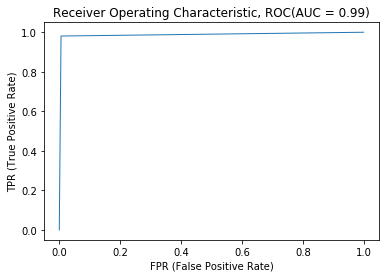

In [25]:
get_aoc(y_test,y_pred)

In [13]:
def get_roc_score(y_test, y_pred):
    """
    计算roc score
    """
    from sklearn.metrics import roc_auc_score
    return roc_auc_score(y_test, y_pred)

In [14]:
def get_evaluation_index(y_test, y_pred):
    print("1.accuracy_score: %s",get_accuracy_score(y_test, y_pred))
    print("2.average_precision_score: %s",get_average_precision_score(y_test, y_pred))
    print("3.confusion_matrix:\n%s",get_confusion_matrix(y_test,y_pred))
    print("4.acuracyc&recall: %s",get_acc_recall(y_test, y_pred))
    print("5.F1_score:\n%s",get_f1_score(y_test,y_pred))
    print("6.roc_auc_score: %s",get_roc_score(y_test,y_pred))
    print("7.AUC:")
    get_aoc(y_test,y_pred)

In [73]:
X.dtype

dtype('float64')

In [75]:
# 关于KNN
knn = knn_model(X_train, y_train)
knn_y_pred = knn.predict(X_test)
knn_y_pred

/work/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/work/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/work/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/work/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/work/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/work/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow e

array([0, 1, 1, ..., 0, 1, 1])

/work/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/work/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/work/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/work/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/work/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/work/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow e

1.accuracy_score: %s 0.9916
2.average_precision_score: %s 0.9619133264231856
3.confusion_matrix:
%s [[7974   46]
 [  38 1942]]
4.acuracyc&recall: %s (0.9942643391521196, 0.8041549011698266)
5.F1_score:
%s               precision    recall  f1-score   support

           0       1.00      0.99      0.99      8020
           1       0.98      0.98      0.98      1980

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

6.roc_auc_score: %s 0.9875362099801002
7.AUC:


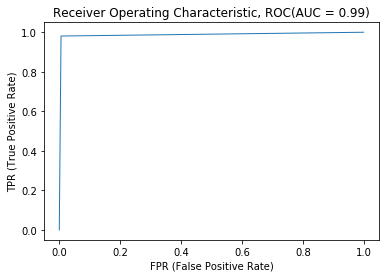

In [104]:
get_evaluation_index(y_test,knn_y_pred)

In [89]:
# Input contains NaN, infinity or a value too large for dtype('float32')
X[np.isnan(X)],X[np.isinf(X)]

(array([], dtype=float64), array([], dtype=float64))

In [15]:
def convern_tofloat32(X):
    """
    由于算法对数据集类型的不同，转换函数
    """
    dt_X=X.astype('float32')
    dt_X=np.nan_to_num(dt_X)
    return dt_X

In [16]:
def is_nan_inf(X):
    """
    判断是否有空值或者inf值
    """
    return np.isinf(X).any() or np.isnan(X).any()

In [21]:
[] == []

True

In [96]:
dt_X_train,dt_X_test,dt_y_train,dt_y_test=split_X_y(dt_X,y)

In [67]:
def dt_model(X_train,y_train):
    from sklearn.tree import DecisionTreeClassifier
    dec_tree = DecisionTreeClassifier(criterion='gini',
                                  splitter='best',
                                  max_depth=5,
                                  min_samples_split=2,
                                  min_samples_leaf=1,
                                  min_weight_fraction_leaf=0.0,
                                  max_features=None,
                                  random_state=None,
                                  max_leaf_nodes=None,
                                  min_impurity_decrease=0.0,
                                  min_impurity_split=None,
                                  class_weight=None,
                                  presort=False)
    dec_tree.fit(X_train,y_train)
    return dec_tree

In [97]:
%%time
# DT
dt = dt_model(dt_X_train, dt_y_train)
dt_y_pred = dt.predict(dt_X_test)
dt_y_pred

CPU times: user 1.27 s, sys: 0 ns, total: 1.27 s
Wall time: 1.31 s


array([0, 1, 1, ..., 0, 1, 1])

In [ ]:
# 保存DT tree?

/work/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/work/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/work/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/work/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/work/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/work/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow e

1.accuracy_score: %s 0.9916
2.average_precision_score: %s 0.9704016875461319
3.confusion_matrix:
%s [[7979   41]
 [  23 1957]]
4.acuracyc&recall: %s (0.9948877805486285, 0.8030394524959742)
5.F1_score:
%s               precision    recall  f1-score   support

           0       1.00      0.99      1.00      8020
           1       0.98      0.99      0.98      1980

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

6.roc_auc_score: %s 0.9916358094662334
7.AUC:


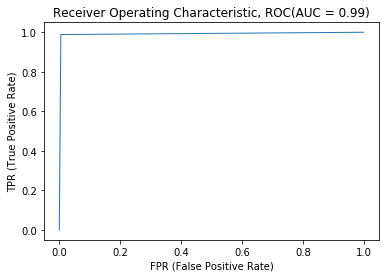

In [103]:
get_evaluation_index(dt_y_test,dt_y_pred)

In [109]:
# RF 随机森林
def rf_model(X_train, y_train):
    from sklearn.ensemble import RandomForestClassifier
    rf = RandomForestClassifier(
        n_estimators=200,
        criterion='gini',
        max_depth=5,  # 最大深度
        min_samples_split=2,
        min_samples_leaf=1,
        min_weight_fraction_leaf=0.0,
        max_features='auto',
        max_leaf_nodes=None,
        min_impurity_decrease=0.0,
        min_impurity_split=None,
        bootstrap=True,
        oob_score=False,
        n_jobs=30,
        random_state=None,
        verbose=0,
        warm_start=False,
        class_weight=None)
    rf.fit(X_train, y_train)
    return rf

In [111]:
# Input contains NaN, infinity or a value too large for dtype('float32')
rf = rf_model(dt_X_train, dt_y_train)
rf_y_pred = rf.predict(dt_X_test)
rf_y_pred

array([0, 1, 1, ..., 0, 1, 1])

/work/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/work/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/work/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/work/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/work/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/work/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow e

1.accuracy_score: %s 0.9916
2.average_precision_score: %s 0.9443250060284543
3.confusion_matrix:
%s [[8001   19]
 [ 114 1866]]
4.acuracyc&recall: %s (0.9976309226932668, 0.8108847674065065)
5.F1_score:
%s               precision    recall  f1-score   support

           0       0.99      1.00      0.99      8020
           1       0.99      0.94      0.97      1980

    accuracy                           0.99     10000
   macro avg       0.99      0.97      0.98     10000
weighted avg       0.99      0.99      0.99     10000

6.roc_auc_score: %s 0.9700275825587545
7.AUC:


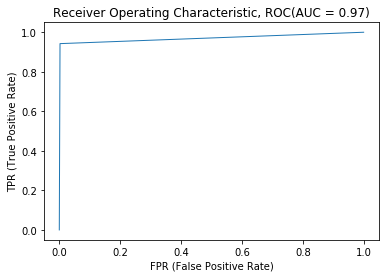

In [112]:
get_evaluation_index(dt_y_test,rf_y_pred)

In [113]:
def xgb_model(X_train, y_train):
    #XGBoot
    from sklearn.ensemble import GradientBoostingClassifier
    xgb = GradientBoostingClassifier(learning_rate=0.2,
                                     n_estimators=100,
                                     subsample=1.0,
                                     criterion='friedman_mse',
                                     min_samples_split=2,
                                     min_samples_leaf=1,
                                     min_weight_fraction_leaf=0.0,
                                     max_depth=5,
                                     min_impurity_decrease=0.0,
                                     min_impurity_split=None,
                                     init=None,
                                     random_state=None,
                                     max_features=None,
                                     verbose=0,
                                     max_leaf_nodes=None,
                                     warm_start=False,
                                     presort='auto',
                                     validation_fraction=0.1,
                                     n_iter_no_change=None,
                                     tol=0.0001)
    xgb.fit(X_train, y_train)
    return xgb

In [115]:
%%time
xgb =xgb_model(dt_X_train, dt_y_train)
xgb_y_pred = xgb.predict(dt_X_test)
xgb_y_pred

array([0, 1, 1, ..., 0, 1, 1])

/work/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/work/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/work/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/work/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/work/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/work/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow e

1.accuracy_score: %s 0.9916
2.average_precision_score: %s 0.9952467459404168
3.confusion_matrix:
%s [[8017    3]
 [   8 1972]]
4.acuracyc&recall: %s (0.9996259351620947, 0.8025828411252378)
5.F1_score:
%s               precision    recall  f1-score   support

           0       1.00      1.00      1.00      8020
           1       1.00      1.00      1.00      1980

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000

6.roc_auc_score: %s 0.9977927655608454
7.AUC:


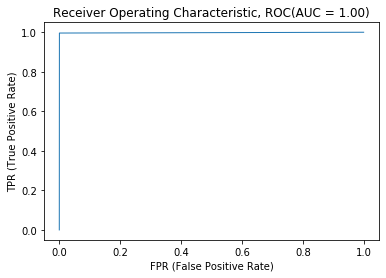

In [116]:
get_evaluation_index(dt_y_test,xgb_y_pred)

In [3]:
# 获得数据集
file_path = '/work/DDos/unbalaced_part.csv'
X,y=get_data_set(file_path)

NameError: name 'get_data_set' is not defined

In [39]:
X,y

(array([[7.6300000e+02, 1.0000000e+00, 1.0000000e+00, ..., 0.0000000e+00,
         0.0000000e+00, 0.0000000e+00],
        [1.0800000e+03, 1.0000000e+00, 1.0000000e+00, ..., 0.0000000e+00,
         0.0000000e+00, 0.0000000e+00],
        [2.3630000e+04, 1.0000000e+00, 3.0000000e+00, ..., 0.0000000e+00,
         0.0000000e+00, 0.0000000e+00],
        ...,
        [4.3000000e+01, 2.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
         0.0000000e+00, 0.0000000e+00],
        [1.3536010e+06, 8.0000000e+00, 7.0000000e+00, ..., 0.0000000e+00,
         0.0000000e+00, 0.0000000e+00],
        [8.7365598e+07, 2.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
         8.7365598e+07, 8.7365598e+07]]),
 array(['Benign', 'ddos', 'Benign', ..., 'Benign', 'Benign', 'Benign'],
       dtype=object))

In [41]:
X=deal_nan_inf(X)
X

array([[7.6300000e+02, 1.0000000e+00, 1.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.0800000e+03, 1.0000000e+00, 1.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [2.3630000e+04, 1.0000000e+00, 3.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [4.3000000e+01, 2.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.3536010e+06, 8.0000000e+00, 7.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [8.7365598e+07, 2.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        8.7365598e+07, 8.7365598e+07]])

In [46]:
is_nan_inf(X)

False

In [45]:
X=max_min_sc(X)
X

/work/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/work/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


array([[6.35835861e-06, 8.84689562e-06, 1.06224772e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [9.00003578e-06, 8.84689562e-06, 1.06224772e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.96917449e-04, 8.84689562e-06, 3.18674315e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [3.58334758e-07, 1.76937912e-05, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.12800532e-02, 7.07751650e-05, 7.43573401e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [7.28049544e-01, 1.76937912e-05, 0.00000000e+00, ...,
        0.00000000e+00, 7.28442316e-01, 7.28442316e-01]])

In [2]:
def hmm_model(X_train, y_train):
    # HMM
    # 需要安装包 hmmlearn
    from hmmlearn import hmm
    h = hmm.GaussianHMM(n_components=5,
                        covariance_type='diag',
                        min_covar=0.001,
                        startprob_prior=1.0,
                        transmat_prior=1.0,
                        means_prior=0,
                        means_weight=0,
                        covars_prior=0.01,
                        covars_weight=1,
                        algorithm='viterbi',
                        random_state=None,
                        n_iter=10,
                        tol=0.01,
                        verbose=False,
                        params='stmc',
                        init_params='stmc')
    h.fit(X_train, y_train)
    return h

In [48]:
X=convern_tofloat32(X)
X.dtype

dtype('float32')

In [49]:
is_nan_inf(X)

False

In [50]:
X

array([[6.3583584e-06, 8.8468960e-06, 1.0622477e-04, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [9.0000358e-06, 8.8468960e-06, 1.0622477e-04, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.9691745e-04, 8.8468960e-06, 3.1867431e-04, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [3.5833474e-07, 1.7693792e-05, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.1280053e-02, 7.0775168e-05, 7.4357342e-04, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [7.2804952e-01, 1.7693792e-05, 0.0000000e+00, ..., 0.0000000e+00,
        7.2844231e-01, 7.2844231e-01]], dtype=float32)

In [53]:
X_train, X_test, y_train, y_test = split_X_y(X, y)

In [1]:
%%time
# Input contains NaN, infinity or a value too large for dtype('float64')
hmm_m=hmm_model(X_train,y_train)

NameError: name 'hmm_model' is not defined

In [46]:
X

array([[7.630000e+02, 1.000000e+00, 1.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [1.080000e+03, 1.000000e+00, 1.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [2.363000e+04, 1.000000e+00, 3.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       ...,
       [4.300000e+01, 2.000000e+00, 0.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [1.353601e+06, 8.000000e+00, 7.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [8.736560e+07, 2.000000e+00, 0.000000e+00, ..., 0.000000e+00,
        8.736560e+07, 8.736560e+07]], dtype=float32)